## Multilayer Perceptron (Deep Neural Network) Using Tensorflow

Task: Build a multilayer perceptron using `tensorflow` and `keras` for the Fashion MNIST classification problem. 
- The Fashion MNIST is multi class problem. The dataset contains 10 classes which represent different fashion products. 
- The neural network should be able to predict the fashion category of the product when given an image.
- A description of each label is given as:
 
**Label:Description**

    0:T-shirt/top
    1:Trouser
    2:Pullover
    3:Dress
    4:Coat
    5:Sandal
    6:Shirt
    7:Sneaker
    8:Bag
    9:Ankle boot

In [8]:
#Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import math

#### Import Dataset
We'll use `tensorflow.keras.datasets` to import the `fashion_mnist` dataset.

In [2]:
# Load the dataset
# Use the keras module to import the necessary data 
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#### Data Visualization/Exploration
Detailed information about the dataset and data visualization is provided in the [Task1_Deep_NN_scratch Notebook]()

### Data Preprocessing
- The images are grayscale, each pixel value has a range from 0 to 255. The images are normalized by dividing by 255.
- The labels are one-hot encoded. A description of one-hot encoding is provided in 

In [3]:
# Define class names as given in Fashion MNIST data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.7584 - val_loss: 0.0262 - val_accuracy: 0.8238
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.8399 - val_loss: 0.0228 - val_accuracy: 0.8464
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.8564 - val_loss: 0.0213 - val_accuracy: 0.8568
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0201 - accuracy: 0.8646 - val_loss: 0.0203 - val_accuracy: 0.8608
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0192 - accuracy: 0.8712 - val_loss: 0.0203 - val_accuracy: 0.8624
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0186 - accuracy: 0.8750 - val_loss: 0.0191 - val_accuracy: 0.8726
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0180 - accuracy: 0.8792 - val_loss: 0.0191 - val_accuracy:

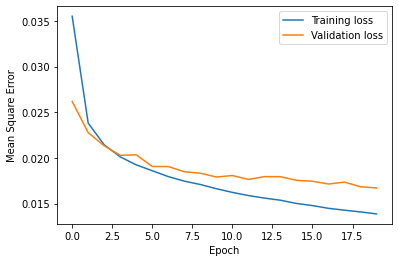

In [5]:
# Compile the model
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.legend()
plt.show()

In [6]:
 def plot(images, labels, predictions=None):
    """Helper function to plot images, labels and predictions
    Parameters
    ----------
    images : 3D matrix of image
    labels : 1D array
    predictions (optional): 1D array
    """
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3, n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(f"lbl: {class_names[y_true]}")
        
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
    
        ax.set_xticks([])
        ax.set_yticks([])

In [13]:

y_pred_labels = y_pred.argmax(axis=1)

TypeError: only integer scalar arrays can be converted to a scalar index

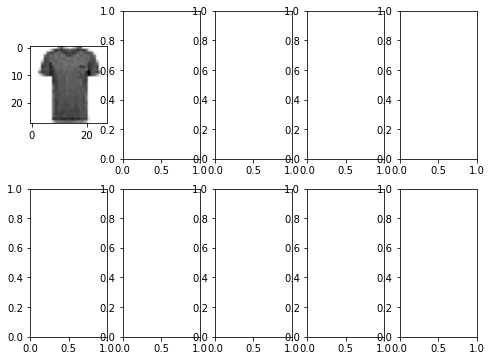

In [15]:
# Convert the predicted one-hot vectors to labels

# plot 20 random data
rand_idxs = np.random.permutation(len(x_test))[:10]

plot(x_test[rand_idxs], y_test[rand_idxs], y_pred_labels[rand_idxs])

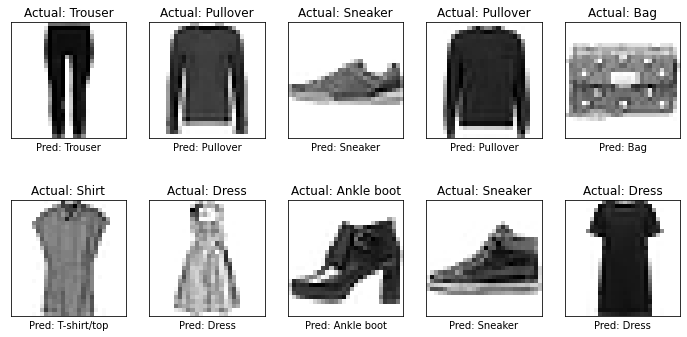

In [17]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predicted one-hot vectors to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Define class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define a function to plot images with their true and predicted labels
def plot2(images, y_true, y_pred=None):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        # Plot image
        x = images[i]
        ax.imshow(x, cmap=plt.cm.binary)

        # Set title with true label
        ax.set_title(f"Actual: {class_names[np.argmax(y_true[i])]}")
        
        # If predicted labels are provided, set subtitle with predicted label
        if y_pred is not None:
            ax.set_xlabel(f"Pred: {class_names[y_pred[i]]}")

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
# Choose 10 random images from the test set
rand_idxs = np.random.permutation(len(x_test))[:10]

# Plot the images with their true and predicted labels
plot2(x_test[rand_idxs], y_test[rand_idxs], y_pred_labels[rand_idxs])
